In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)

C:\Users\MADHU SIDDHARTH S\AppData\Local\Temp\ipykernel_10308\3725004678.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [4]:
catfish_sales

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


In [5]:
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))
catfish_sales

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


In [6]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]
lim_catfish_sales

,Total
Date,
2000-01-01,25412
2000-02-01,25354
2000-03-01,29161
2000-04-01,24924
2000-05-01,24763
2000-06-01,25342
2000-07-01,24911
2000-08-01,25847
2000-09-01,23743


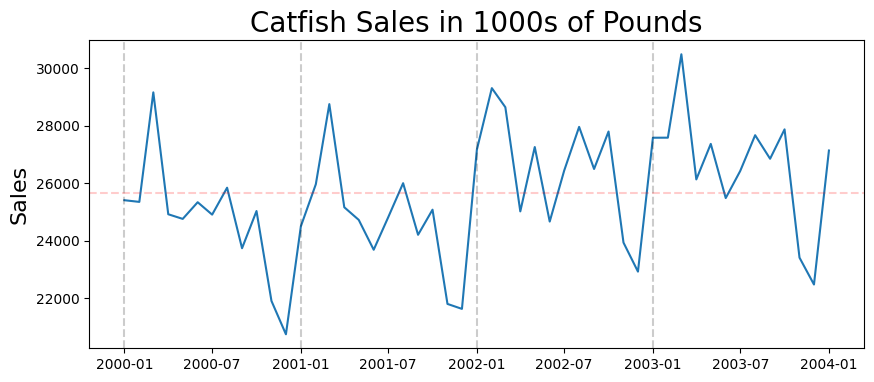

In [7]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_catfish_sales['Total'].mean(), color='r', alpha=0.2, linestyle='--')

In [8]:
first_diff = lim_catfish_sales.diff()[1:]
first_diff

,Total
Date,
2000-02-01,-58.0
2000-03-01,3807.0
2000-04-01,-4237.0
2000-05-01,-161.0
2000-06-01,579.0
2000-07-01,-431.0
2000-08-01,936.0
2000-09-01,-2104.0
2000-10-01,1293.0


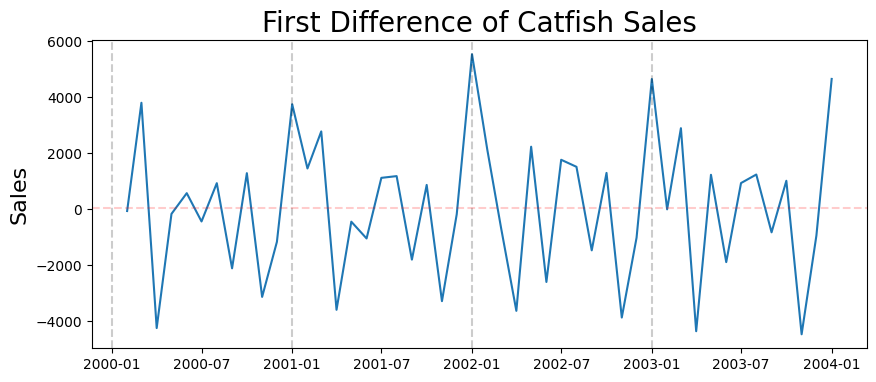

In [9]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff['Total'].mean(), color='r', alpha=0.2, linestyle='--')

<BarContainer object of 17 artists>

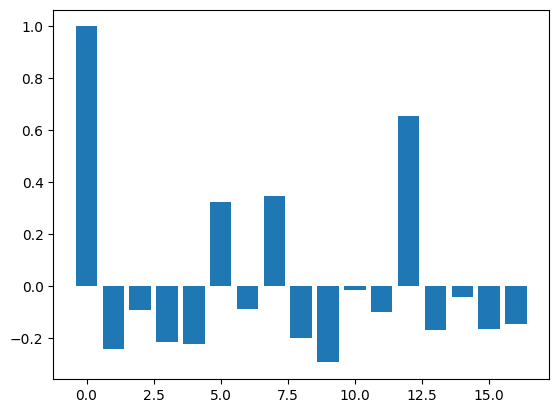

In [10]:
acf_vals = acf(first_diff)
plt.bar(range(17), acf_vals[:17])

<BarContainer object of 17 artists>

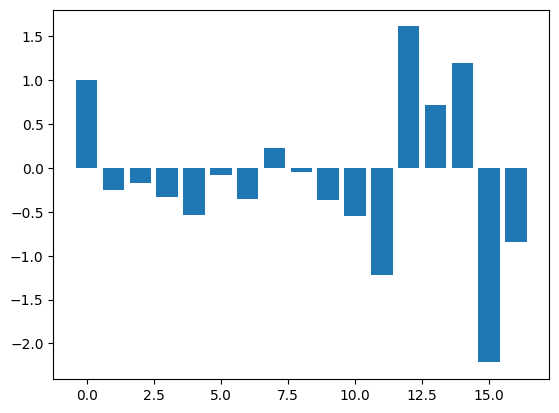

In [11]:
pacf_vals = pacf(first_diff)
plt.bar(range(17), pacf_vals[:17])

In [31]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]
test_data

,Total
Date,
2003-08-01,1245.0
2003-09-01,-819.0
2003-10-01,1022.0
2003-11-01,-4459.0
2003-12-01,-934.0
2004-01-01,4658.0


In [62]:
model = ARIMA(train_data, order=(4,0,1))

In [63]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.3252711296081543


In [64]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -376.598
Date:                Sat, 12 Aug 2023   AIC                            767.195
Time:                        11:09:13   BIC                            779.359
Sample:                    02-01-2000   HQIC                           771.654
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1795    179.935      0.134      0.893    -328.487     376.846
ar.L1         -0.8659      0.222     -3.896      0.000      -1.302      -0.430
ar.L2         -0.4234      0.246     -1.724      0.0

In [65]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date

Timestamp('2003-08-01 00:00:00')

In [66]:
#get the predictions and residuals
predictions = []
for i in test_data.index:
    predictions.append(model_fit.predict(i)[0])
test_data['pred'] = predictions
test_data

C:\Users\MADHU SIDDHARTH S\AppData\Local\Temp\ipykernel_10308\371672911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred'] = predictions


,Total,pred
Date,,
2003-08-01,1245.0,2138.432872
2003-09-01,-819.0,-1872.433919
2003-10-01,1022.0,1428.195248
2003-11-01,-4459.0,-2127.703489
2003-12-01,-934.0,1056.169105
2004-01-01,4658.0,419.991983


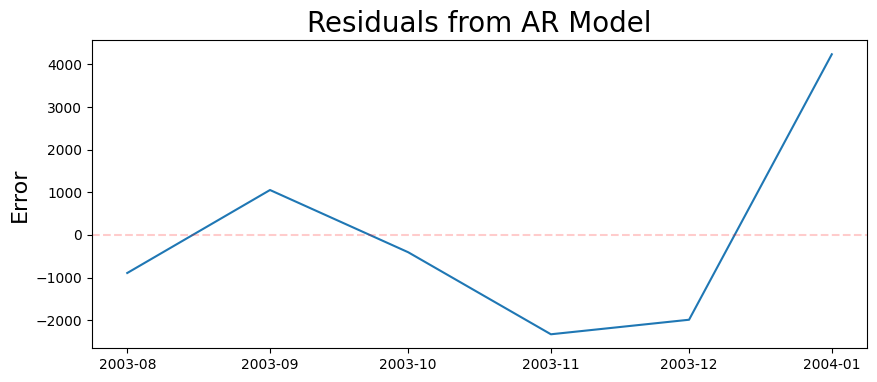

In [67]:
plt.figure(figsize=(10,4))
plt.plot(test_data['Total'] - test_data['pred'])
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

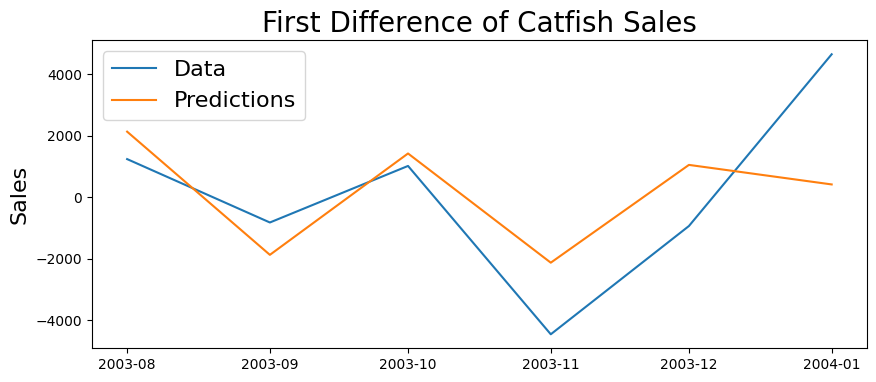

In [68]:
plt.figure(figsize=(10,4))

plt.plot(test_data['Total'])
plt.plot(test_data['pred'])

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [69]:
print('Root Mean Squared Error:', np.sqrt(np.mean(test_data['pred']**2)))

Root Mean Squared Error: 1629.8084844396135


In [21]:
# arma model has been removed from stats model